# Support Vector Machine (Mengantuk Prediction)

## Penjelasan Kolom:

###
- Tingkat Theta = Tingkat rata-rata fluktuasi Gelombang Otak Theta (biasanya berkisar 4–8 Hz), yang secara klinis meningkat saat seseorang memasuki kondisi mengantuk atau tidur ringan. Satuan: Skala relatif (misalnya: µV/Hz).

- Indeks Kedipan Mata = Rasio atau frekuensi kedipan mata. Indeks yang lebih rendah (kedipan mata yang lambat dan panjang) sering mengindikasikan rasa kantuk. Satuan: Indeks relatif.

- Status Kantuk = Kolom target yang menunjukkan jenis status kognitif yang diprediksi: 'Tidak Mengantuk' (Kelas 0) atau 'Mengantuk' (Kelas 1).



## A. Data Preparation

### A.1 Import Libraries

In [550]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(style='darkgrid', font_scale=1.1)

### A.2 Load Data

In [551]:
try:
    df = pd.read_csv("mengantuk.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [552]:
df.head()

,Tingkat Theta,Indeks Kedipan Mata,Status Kantuk
0,4.16,21.75,Tidak Mengantuk
1,13.00,15.87,Mengantuk
2,7.45,14.09,Mengantuk
3,10.69,15.83,Mengantuk
4,9.28,23.36,Mengantuk


In [553]:
df.tail()

,Tingkat Theta,Indeks Kedipan Mata,Status Kantuk
995,3.76,28.56,Tidak Mengantuk
996,11.09,18.01,Mengantuk
997,6.90,13.75,Mengantuk
998,11.89,16.87,Mengantuk
999,6.87,22.40,Tidak Mengantuk


### A.4 Melihat Informasi Data

In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tingkat Theta        1000 non-null   float64
 1   Indeks Kedipan Mata  1000 non-null   float64
 2   Status Kantuk        1000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


### A.5 Melihat Dimensi Data

In [555]:
df.shape

(1000, 3)

### A.6 Cek Data Duplikat

In [556]:
df.duplicated().sum()

np.int64(0)

### A.7 Cek Data Hilang

In [557]:
df.isna().sum()

Tingkat Theta          0
Indeks Kedipan Mata    0
Status Kantuk          0
dtype: int64

### A.8 Cek Statistik Data

In [1]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

NameError: name 'df' is not defined

### A.9 Cek Outliers Data

<Figure size 1000x800 with 0 Axes>

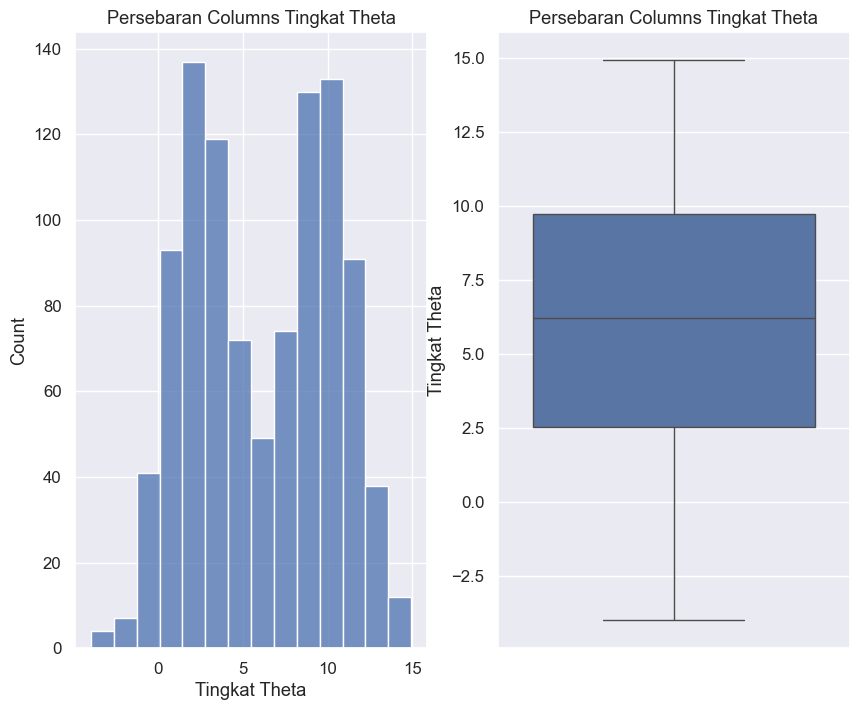

<Figure size 1000x800 with 0 Axes>

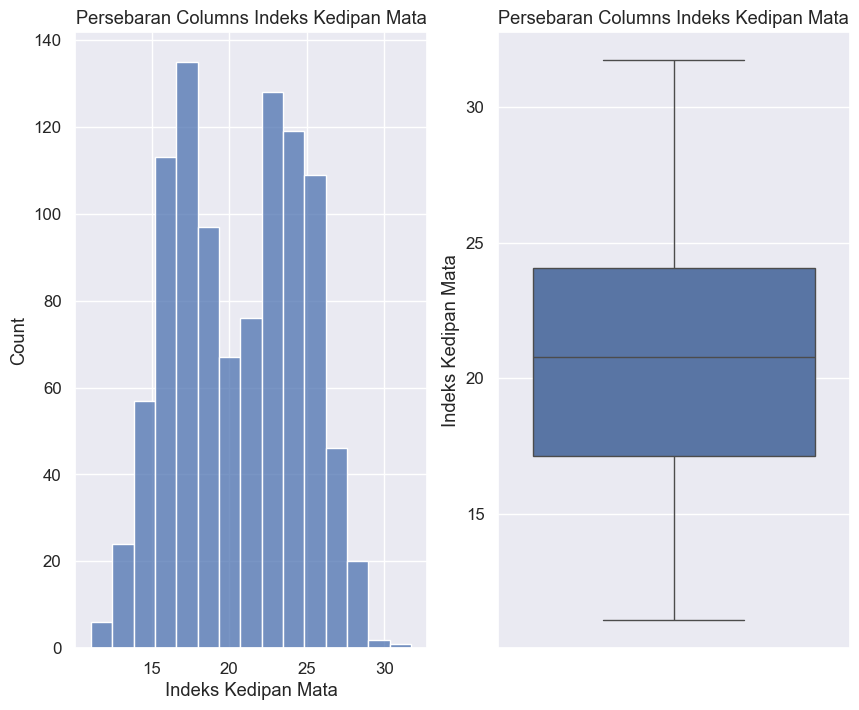

In [559]:
for col in df.select_dtypes(include='number'):
 plt.figure(figsize=(10, 8))
 fig, axes = plt.subplots(1, 2, figsize=(10, 8))
 sns.histplot(df[col], ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")


## B. Exploratory Data Analysis (EDA)

### B.1 Univariate Analysis

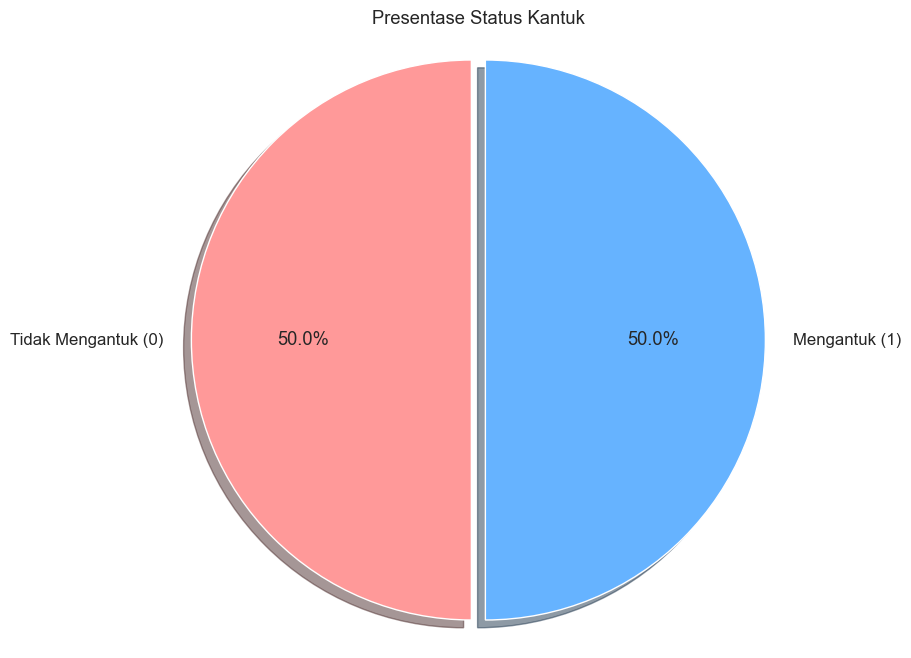

In [560]:
StatusKantuk = df['Status Kantuk'].value_counts()

label = ['Tidak Mengantuk (0)', 'Mengantuk (1)']

plt.figure(figsize=(10, 8))
plt.pie(StatusKantuk,
        labels=label,
        autopct = '%1.1f%%', # fungsi untuk menampilkan persen
        startangle=90, # memutar posisi awal 90 derajat
        colors=['#ff9999', '#66b3ff'], # mengatur warna merah muda dan biru
        explode=(0.05, 0), # efek potongan kue
        shadow= True) # mengatur bayangan biar seperti 3D

plt.title("Presentase Status Kantuk")
plt.axis('equal')
plt.show()

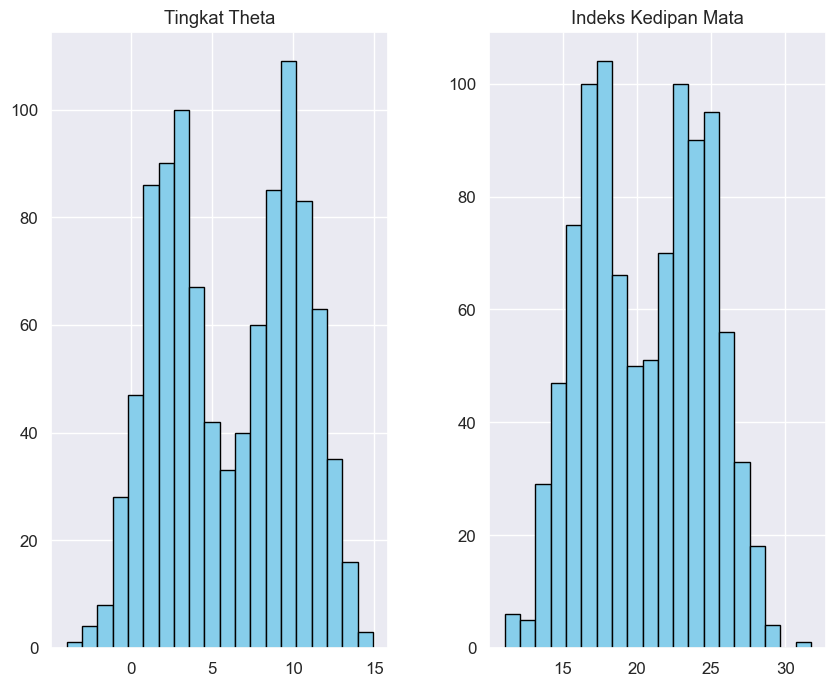

In [561]:
num = df.select_dtypes(include='number')

num.hist(bins = 20, edgecolor = 'black', color='skyblue', figsize=(10, 8))
plt.show()

### B.2 Bivariate Analysis

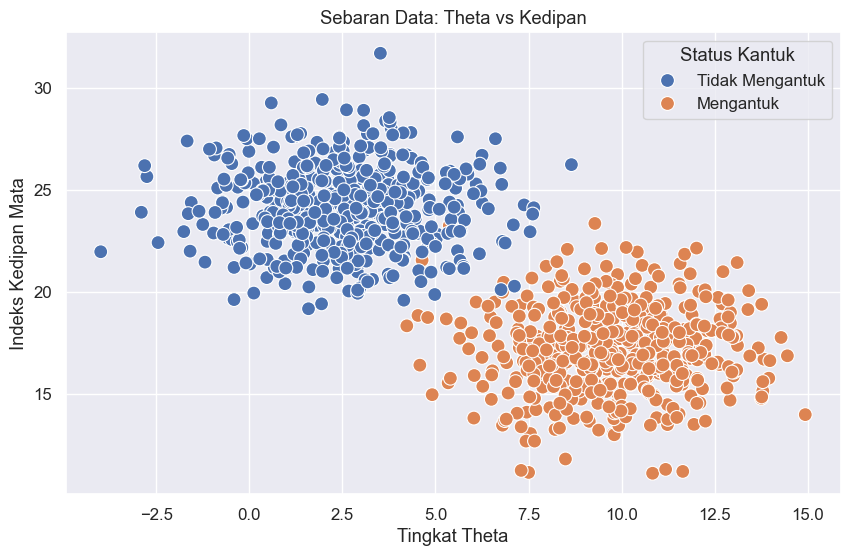

In [562]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tingkat Theta', y='Indeks Kedipan Mata', hue='Status Kantuk', s=100)
plt.title("Sebaran Data: Theta vs Kedipan")
plt.show()

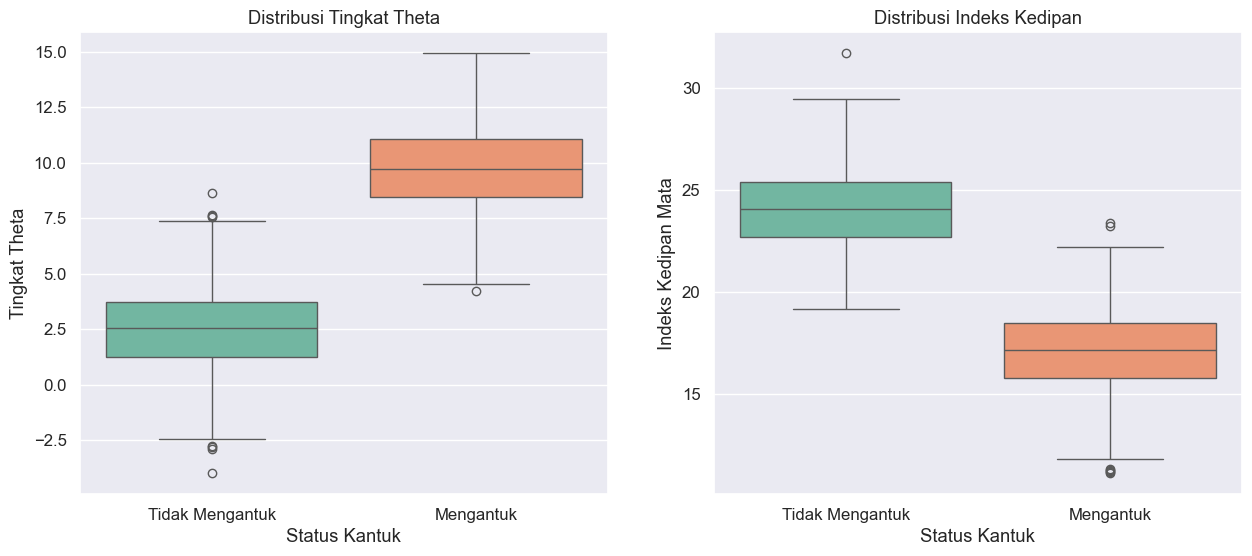

In [563]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gambar 1: Hubungan Status vs Theta
sns.boxplot(data=df, x='Status Kantuk', y='Tingkat Theta', ax=axes[0], palette='Set2', hue='Status Kantuk', legend=False)
axes[0].set_title("Distribusi Tingkat Theta")
# Gambar 2: Hubungan Status vs Kedipan
sns.boxplot(data=df, x='Status Kantuk', y='Indeks Kedipan Mata', ax=axes[1], palette='Set2', hue='Status Kantuk', legend=False)
axes[1].set_title("Distribusi Indeks Kedipan")

plt.show()

### B.3 Multivariate Analysis

In [564]:
mengantuk_mapping = {'Mengantuk' : 1, 'Tidak Mengantuk' : -1}
df['Status Kantuk'] = df['Status Kantuk'].map(mengantuk_mapping)

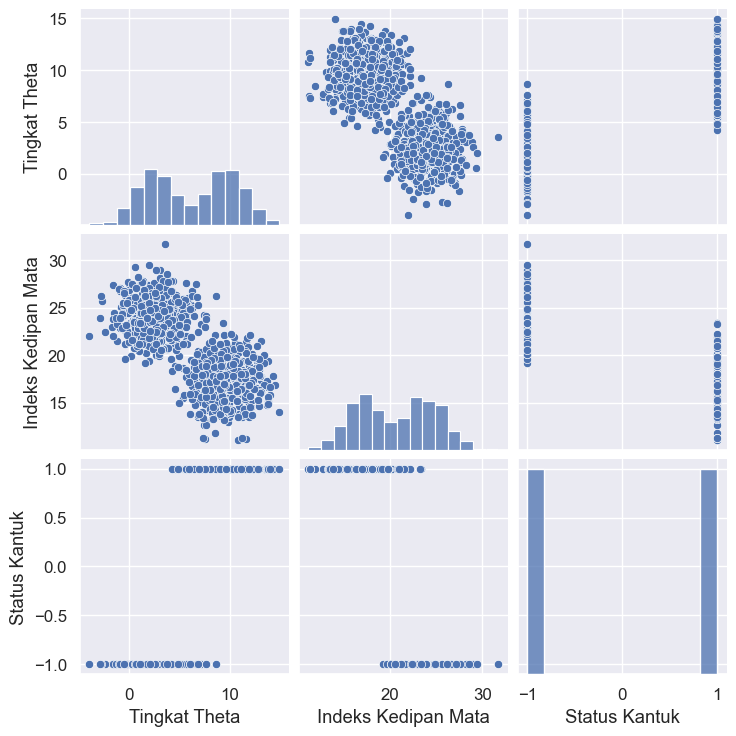

In [565]:
sns.pairplot(df)

<Axes: >

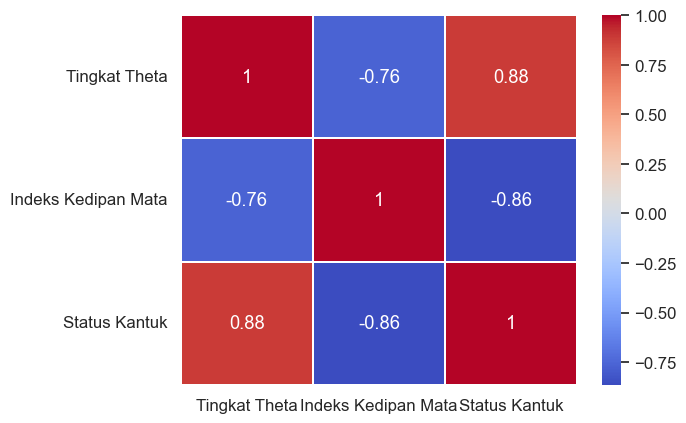

In [566]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1.1)

## C. Data Preprocessing

### C.1 Encoding Label

In [567]:
# mengantuk_mapping = {'Mengantuk' : 1, 'Tidak Mengantuk' : -1}
# df['Status Kantuk'] = df['Status Kantuk'].map(mengantuk_mapping)
# df['Status Kantuk']

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [568]:
X_data = df.drop(columns='Status Kantuk')
y_data = df['Status Kantuk']

### D.2 Standarisasi Features

In [569]:
X_data = (X_data - X_data.mean(axis=0)) / X_data.std(axis=0)

### D.3 Splitting Data Training and Data Testing (80:20)

In [570]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42):
    np.random.seed(random_state)

    X_train_list, X_test_list = [],[]
    y_train_list, y_test_list = [],[]
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data==class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

In [571]:
print("Rasio Orang Mengantuk di Data Asli:")
print(np.mean(y_data == 1)) 

print("\nRasio Orang Mengantuk di Data Training (Hasil Stratified Split):")
print(np.mean(y_train == 1))

Rasio Orang Mengantuk di Data Asli:
0.5

Rasio Orang Mengantuk di Data Training (Hasil Stratified Split):
0.5


### D.4 Support Vector Machine 🥳🥳🥳🥳🥳

#### Training SVM

In [ ]:
def train_svm(X, y, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    X = np.array(X)
    y = np.array(y)
    
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for i in range(n_iters):
        for idx, x_i in enumerate(X):
            
            condition = y[idx] * (np.dot(x_i, weights) + bias) >= 1
            
            if condition:
                weights -= learning_rate * (2 * lambda_param * weights)
            else:
                weights -= learning_rate * (2 * lambda_param * weights - np.dot(x_i, y[idx]))
                bias += learning_rate * y[idx]
                
    return weights, bias


#### Prediksi SVM

In [ ]:
def predict_svm(X, weights, bias):
    X = np.array(X)
    linear_output = np.dot(X, weights) + bias
    return np.sign(linear_output)

#### Hasil Prediksi SVM

In [574]:
best_w, best_b = train_svm(X_train, y_train, learning_rate=0.001, lambda_param=0.01, n_iters=1000)
print(f"Bobot Terbaik:{best_w}")
print(f"Bias Terbaik:{best_b}")

y_pred_test = predict_svm(X_test, best_w, best_b)
y_pred_train = predict_svm(X_train, best_w, best_b)

Bobot Terbaik:[ 1.22841002 -1.07814659]
Bias Terbaik:-0.009999999999999953


## E. Evaluasi

### E.1 Akurasi

#### Akurasi Test

In [575]:
test_accuracy = np.mean(y_pred_test == y_test)
test_accuracy

np.float64(1.0)

#### Akurasi Train

In [576]:
train_accuracy = np.mean(y_pred_train == y_train)
train_accuracy

np.float64(0.99375)

### E.2 Confusion Matrix

In [577]:
TP = np.sum((y_pred_test == 1) & (y_test == 1))
FP = np.sum((y_pred_test == 1) & (y_test == -1))
TN = np.sum((y_pred_test == -1) & (y_test == -1))
FN = np.sum((y_pred_test == -1) & (y_test == 1))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"True Negatives: {TN}")
print(f"False Negatives: {FN}")

True Positives: 100
False Positives: 0
True Negatives: 100
False Negatives: 0


### E.3 Precision

In [578]:
precision = TP / (TP + FP)
precision

np.float64(1.0)

### E.4 Recall

In [579]:
recall = TP / (TP + FN)
recall

np.float64(1.0)

### E.5 F-1 Score

In [580]:
f1 = 2 * (precision * recall / precision + recall)
f1

np.float64(4.0)

### E.6 Visualisasi SVM

In [583]:
def plot_decision_boundary(X, y, weights, bias):
    # Pastikan X dan y adalah numpy array
    X = np.array(X)
    y = np.array(y)

    # Membuat meshgrid untuk ruang fitur
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Step size grid (0.1) bisa diperkecil biar lebih halus, misal 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    # Menghitung prediksi untuk setiap titik di grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    Z = predict_svm(grid_points, weights, bias) 
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    
    Z_raw = np.dot(grid_points, weights) + bias
    Z_raw = Z_raw.reshape(xx.shape)

    plt.contour(xx, yy, Z_raw, colors='black', levels=[-1, 0, 1], 
                alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data asli
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k', s=100)

    plt.title("SVM Decision Boundary")
    plt.xlabel("Tingkat Theta")
    plt.ylabel("Indeks Kedipan Mata")
    plt.show()

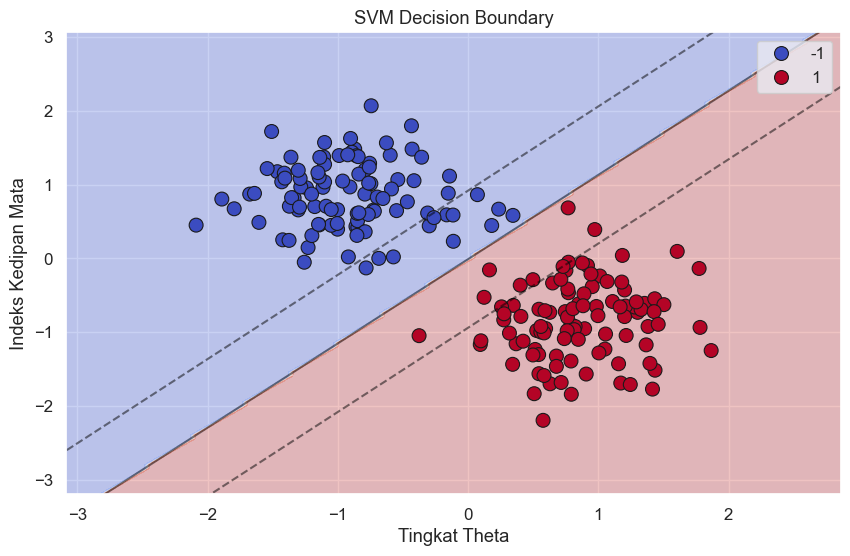

In [584]:
plot_decision_boundary(X_test, y_test, best_w, best_b)